<a href="https://colab.research.google.com/github/PrathamMahajan/Stock-Market-Fundamental-Prediction/blob/main/StockMarketML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
stocks = pd.read_csv('/content/nifty_500_data.csv')

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   482 non-null    object 
 1   market_cap                   482 non-null    int64  
 2   current_price                482 non-null    float64
 3   high_price                   482 non-null    float64
 4   low_price                    482 non-null    float64
 5   stock_PE                     482 non-null    float64
 6   Book_Value                   482 non-null    float64
 7   Dividend_Yield               482 non-null    float64
 8   ROCE                         482 non-null    float64
 9   ROE                          482 non-null    float64
 10  net_profit_tminus3           482 non-null    float64
 11  net_profit_tminus2           482 non-null    float64
 12  net_profit_tminus1           482 non-null    float64
 13  net_profit_t        

In [ ]:
stocks.shape

(482, 70)

In [ ]:
stocks.rename(columns = {'market_cap':'Market Capture', 'stock_PE':'P/E Ratio', 'Dividend_Yield':'Dividend', 'ROE':'ROE', 'promoters_t':'Promoter Holdings', 'compounded_profit_growth':'Profit Growth %' , 'compounded_sales_growth':'Sales Growth %', 'ROCE':'ROCE' }, inplace = True)

In [ ]:
stocks = stocks[['Market Capture', 'P/E Ratio', 'Dividend', 'ROE', 'Promoter Holdings', 'Profit Growth %', 'Sales Growth %', 'ROCE']]

In [ ]:
stocks.shape

(482, 8)

In [ ]:
stocks.describe()

,Market Capture,P/E Ratio,Dividend,ROE,Promoter Holdings,Profit Growth %,Sales Growth %,ROCE
count,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.00000,482.000000,482.000000
mean,4.014489e+04,54.155768,1.171349,13.187946,54.661037,-22.16805,-5.796680,17.124046
std,1.096750e+05,92.618187,1.973444,23.095786,19.845755,552.39436,45.371281,17.606389
min,1.338000e+03,0.000000,0.000000,-230.000000,0.000000,-10399.00000,-108.000000,-182.000000
25%,5.055250e+03,13.000000,0.102500,6.450000,44.032500,-41.00000,-18.750000,8.082500
50%,1.184850e+04,28.400000,0.500000,13.400000,56.230000,-8.00000,-7.000000,15.400000
75%,3.202300e+04,57.875000,1.230000,20.575000,70.410000,25.75000,4.000000,23.375000
max,1.407835e+06,958.000000,16.500000,270.000000,95.840000,3968.00000,847.000000,143.000000


In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Market Capture     482 non-null    int64  
 1   P/E Ratio          482 non-null    float64
 2   Dividend           482 non-null    float64
 3   ROE                482 non-null    float64
 4   Promoter Holdings  482 non-null    float64
 5   Profit Growth %    482 non-null    int64  
 6   Sales Growth %     482 non-null    int64  
 7   ROCE               482 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 30.2 KB


In [ ]:
stocks.isnull().sum()

Market Capture       0
P/E Ratio            0
Dividend             0
ROE                  0
Promoter Holdings    0
Profit Growth %      0
Sales Growth %       0
ROCE                 0
dtype: int64

In [ ]:
#finding correlation between all the columns
correlation = stocks.corr()

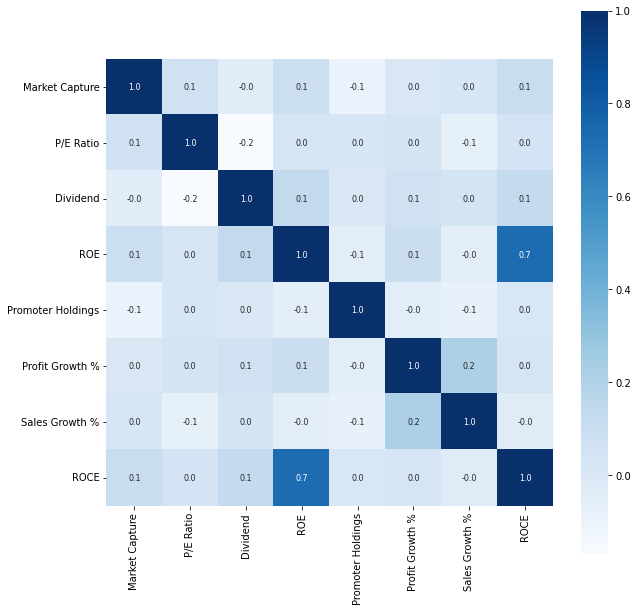

In [ ]:
#constructing the heatmap to understand the correaltion between the columns
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
stocks.columns

Index(['Market Capture', 'P/E Ratio', 'Dividend', 'ROE', 'Promoter Holdings',
       'Profit Growth %', 'Sales Growth %', 'ROCE'],
      dtype='object')

In [ ]:
#seperate the data and label
x = stocks.drop('ROE',axis=1)

In [ ]:
x

,Market Capture,P/E Ratio,Dividend,Promoter Holdings,Profit Growth %,Sales Growth %,ROCE
0,30807,533.0,0.00,75.00,-81,-19,16.20
1,31174,178.0,0.34,75.00,-49,-20,6.98
2,33570,21.9,0.78,54.53,14,-12,16.70
3,18207,23.2,1.40,58.47,45,-3,26.50
4,15703,126.0,0.00,39.47,-9,-12,11.00
...,...,...,...,...,...,...,...
477,39837,0.0,0.00,0.00,84,-26,-0.52
478,21016,37.5,0.14,4.02,-62,-9,19.60
479,6422,23.0,0.98,49.22,15,0,20.60
480,12021,0.0,0.26,64.82,-21,-31,1.78


In [ ]:
y = stocks['ROE'].apply(lambda y_value: 1 if y_value>=16 else 0 )

In [ ]:
print(y)

0      0
1      0
2      0
3      1
4      0
      ..
477    0
478    0
479    0
480    0
481    0
Name: ROE, Length: 482, dtype: int64


In [ ]:
x_train, x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state = 2)

In [ ]:
print(y.shape , y_train.shape , y_test.shape)

(482,) (385,) (97,)


MODEL TRAINING RANDOM FOREST DECISION TREE CLASSIFIER

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction , y_test)

In [ ]:
print('Accuracy of RandomForestClassifier: ', test_data_accuracy)

Accuracy of RandomForestClassifier:  0.9278350515463918


In [ ]:
x.columns

Index(['Market Capture', 'P/E Ratio', 'Dividend', 'Promoter Holdings',
       'Profit Growth %', 'Sales Growth %', 'ROCE'],
      dtype='object')

DRAWBACK of this ML Model is that it will give the result as weak if the stock is fundamentally moderate.

In [ ]:
input_data = (68476, 26.9, 0.81, 446.9, 70.1, 35.6, 19.3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==1):
  print("Stock is Fundamentally Stong")
else:
  print("Stock is Fundamentally Weak")

[0]
Stock is Fundamentally Weak


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
